<h1 align="center">Estructura de Datos y Algoritmos II</h1>
<h1 align="center">Algoritmos Avanzados</h1>
<h1 align="center">Ejemplo Regresión Logística - Clasificación</h1>
<h1 align="center">2024</h1>
<h1 align="center">MEDELLÍN - COLOMBIA </h1>

*** 
|[![Outlook](https://img.shields.io/badge/Microsoft_Outlook-0078D4?style=plastic&logo=microsoft-outlook&logoColor=white)](mailto:calvar52@eafit.edu.co)||[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/carlosalvarezh/EstructuraDatosAlgoritmos2/blob/main/S08_Ejemplo_RegresionLogistica.ipynb)
|-:|:-|--:|
|[![LinkedIn](https://img.shields.io/badge/linkedin-%230077B5.svg?style=plastic&logo=linkedin&logoColor=white)](https://www.linkedin.com/in/carlosalvarez5/)|[![@alvarezhenao](https://img.shields.io/twitter/url/https/twitter.com/alvarezhenao.svg?style=social&label=Follow%20%40alvarezhenao)](https://twitter.com/alvarezhenao)|[![@carlosalvarezh](https://img.shields.io/badge/github-%23121011.svg?style=plastic&logo=github&logoColor=white)](https://github.com/carlosalvarezh)|

<table>
 <tr align=left><td><img align=left src="https://github.com/carlosalvarezh/Curso_CEC_EAFIT/blob/main/images/CCLogoColorPop1.gif?raw=true" width="25">
 <td>Text provided under a Creative Commons Attribution license, CC-BY. All code is made available under the FSF-approved MIT license.(c) Carlos Alberto Alvarez Henao</td>
</table>

***

## Introducción

La Regresión Logística es un algoritmo clave en el aprendizaje automático, particularmente útil para clasificar elementos en categorías binarias. Este método no solo sirve para análisis estadístico, sino que también permite interpretar datos de manera narrativa, traduciendo historias numéricas en resultados binarios.

Un ejemplo práctico interesante de su aplicación es la clasificación de especies de pingüinos utilizando un [conjunto de datos disponible en Kaggle](https://www.kaggle.com/datasets/martaarroyo/palmer-penguins-for-binary-classification?resource=download). Este conjunto de datos se enfoca en dos especies de pingüinos: [Adelie y Gentoo](https://allisonhorst.github.io/palmerpenguins/articles/intro.html#meet-the-penguins). En este contexto, la Regresión Logística ayuda a predecir a qué especie pertenece un pingüino en particular, asignando 0 a la especie Adelie y 1 a la especie Gentoo. 

<p float="center">
  <img src="https://github.com/carlosalvarezh/EstructuraDatosAlgoritmos2/blob/main/images/Penguin02.PNG?raw=true" width="250" />
</p>


El proceso comienza con la selección y el análisis de características relevantes de los pingüinos, como la longitud y profundidad del culmen, a partir de los cuales se puede predecir la especie. 

<p float="center">
  <img src="https://github.com/carlosalvarezh/EstructuraDatosAlgoritmos2/blob/main/images/Penguin00.jpeg?raw=true" width="250" />
</p>

Estas características se utilizan para entrenar el modelo de Regresión Logística. La efectividad del modelo se puede medir por su precisión, siendo posible incluso visualizar la frontera de decisión en un espacio bidimensional cuando se trabaja con un número limitado de características. 

El proyecto en GitHub penguins_classification ejemplifica cómo se utilizan librerías como Numpy, Matplotlib, Pandas, Seaborn y Scikit-learn para extraer características y clasificar especies de pingüinos. Se demuestra cómo la Regresión Logística, junto con otros modelos como Random Forest y Máquinas de Soporte Vectorial, pueden alcanzar una precisión superior al 98% en este tipo de tareas.

Este ejemplo es representativo de cómo la Regresión Logística se utiliza en problemas de clasificación binaria en el mundo real, proporcionando una herramienta efectiva y comprensible para la toma de decisiones basadas en datos.

***Nota:*** El dataset es más extenso e incluye una tercera especie de pingüino (Chinstrap), pero para efectos de este trabajo, solo se considerarán dos especies. 

## Análisis Exploratorio de los Datos (EDA)

### Dataset

El conjunto de datos (dataset) contiene 6 columnas:

- ***species:*** Esta variable indica la especie del pingüino. Hay dos especies en este conjunto de datos: Adélie y Gentoo. Cada especie tiene características distintivas y son nativas de diferentes áreas en y alrededor de la Antártida.
- ***island:*** Indica la isla en la que se observó al pingüino. Las opciones son Dream, Torgersen o Biscoe, todas ubicadas en el Archipiélago Palmer en la Antártida. La ubicación puede estar relacionada con la especie de pingüino, ya que diferentes especies prefieren diferentes ambientes.
- ***bill_length_mm:*** El culmen es la parte superior del pico del pingüino. La longitud del culmen se mide en milímetros y es un indicador importante para diferenciar especies.
- ***bill_depth_mm:*** Esta es la medida de la profundidad del pico del pingüino, también en milímetros. Junto con la longitud, la profundidad del culmen ayuda a identificar diferencias morfológicas entre las especies.
- ***flipper_length_mm:*** Esta variable mide la longitud de la aleta del pingüino en milímetros. Las diferencias en la longitud de las aletas pueden estar relacionadas con la especie del pingüino, así como con su capacidad para nadar y su comportamiento en el agua.
- ***body_mass_g:*** La masa corporal se registra en gramos. Es un indicador vital que puede estar relacionado con la salud general del pingüino, su habilidad para reproducirse, y su capacidad de sobrevivir en distintas condiciones ambientales.

### Importación de las bibliotecas

In [1]:
import pandas as pd
import numpy  as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


In [2]:
# cargue del conjunto de datos 
df = pd.read_csv("penguins.csv")
df = df.drop(columns="year") # en este trabajo no se considerará el año de toma del dato
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0
...,...,...,...,...,...,...
269,Gentoo,Biscoe,47.2,13.7,214.0,4925.0
270,Gentoo,Biscoe,46.8,14.3,215.0,4850.0
271,Gentoo,Biscoe,50.4,15.7,222.0,5750.0
272,Gentoo,Biscoe,45.2,14.8,212.0,5200.0


### Descripción del dataset

In [3]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,274.000000,274.000000,274.000000,274.000000
mean,42.702920,16.836131,202.178832,4318.065693
std,5.195566,2.013410,15.047938,835.933105
min,32.100000,13.100000,172.000000,2850.000000
25%,38.350000,15.000000,190.000000,3600.000000
50%,42.000000,17.000000,198.000000,4262.500000
75%,46.675000,18.500000,215.000000,4950.000000
max,59.600000,21.500000,231.000000,6300.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            274 non-null    object 
 1   island             274 non-null    object 
 2   bill_length_mm     274 non-null    float64
 3   bill_depth_mm      274 non-null    float64
 4   flipper_length_mm  274 non-null    float64
 5   body_mass_g        274 non-null    float64
dtypes: float64(4), object(2)
memory usage: 13.0+ KB


Verificamos la distribución de individuos que tenemos para cada especie. Recuerda que los conjuntos de datos fuertemente desequilibrados pueden ser un problema.

species
Adelie    151
Gentoo    123
Name: count, dtype: int64


C:\Users\USER\AppData\Local\Temp\ipykernel_3528\2548095412.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df["species"], palette=["purple", "orange"])


<Axes: xlabel='count', ylabel='species'>

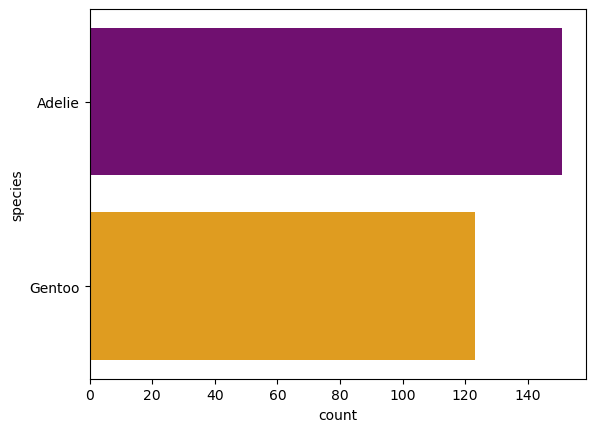

In [5]:
print(df["species"].value_counts())
sns.countplot(y=df["species"], palette=["purple", "orange"])

- ***heatmap:*** Para entender qué variables tienen un impacto significativo en nuestras especies de pingüinos, podemos usar diferentes comandos. El primero es un Mapa de Calor, que representa visualmente la correlación entre todos los pares de columnas numéricas dentro de nuestro DataFrame. La correlación varía de 1 a -1 e indica la fuerza y dirección de su relación.

<Axes: >

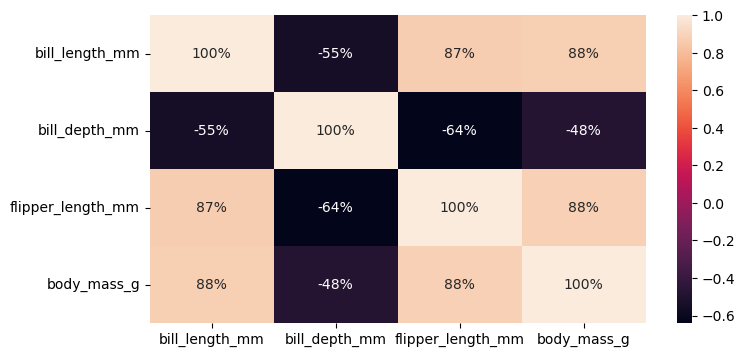

In [6]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(8, 4))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".0%")

El mapa de calor muestra la matriz de correlación de cuatro variables físicas de los pingüinos: longitud del pico (bill_length_mm), profundidad del pico (bill_depth_mm), longitud de la aleta (flipper_length_mm) y masa corporal (body_mass_g). Aquí hay algunas conclusiones basadas en la gráfica:

1. **Correlación Positiva Fuerte**: Hay una fuerte correlación positiva (87% y 88%) entre la longitud de la aleta y las otras dos variables de tamaño corporal: la longitud del pico y la masa corporal. Esto indica que los pingüinos con aletas más largas también tienden a tener picos más largos y un mayor peso corporal.

2. **Correlación Negativa Moderada**: Existe una correlación negativa moderada entre la profundidad del pico y la longitud de la aleta (-64%), así como entre la profundidad del pico y la masa corporal (-48%). Esto podría sugerir que los pingüinos con picos más profundos tienen aletas más cortas y un peso corporal menor, lo cual puede ser una adaptación evolutiva o característica específica de la especie.

3. **Autocorrelación**: Como se espera, la diagonal principal muestra una autocorrelación del 100%, ya que es la correlación de cada variable consigo misma.

4. **Independencia entre Longitud y Profundidad del Pico**: Una correlación negativa de -55% entre la longitud y la profundidad del pico sugiere que estas dos medidas tienden a variar en direcciones opuestas; por ejemplo, pingüinos con picos más largos tienden a tener picos menos profundos.

Estas correlaciones pueden indicar patrones morfológicos significativos entre las características físicas de los pingüinos y podrían ser importantes para estudios de diferenciación de especies, adaptación al medio ambiente, y otras investigaciones biológicas y ecológicas.

- ***pairplot;*** Genera una cuadrícula de diagramas de dispersión, cada uno mostrando la relación entre dos variables diferentes en el conjunto de datos y con colores basados en las especies. Esto proporciona una visión general de cómo interactúan las diferentes variables y cómo estas interacciones varían según la especie.

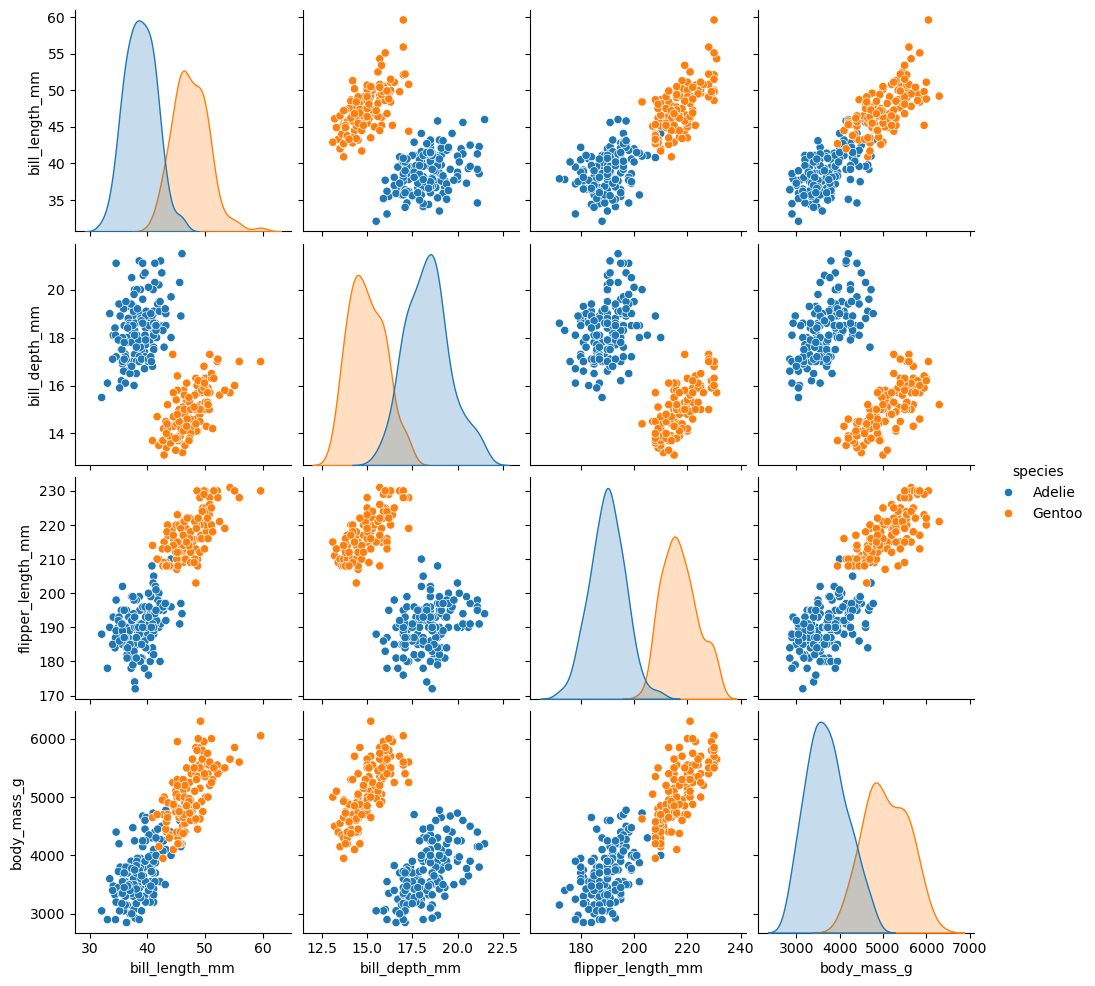

In [7]:
df_temp = df.drop(columns=["bill_length_mm", "body_mass_g"])
sns.pairplot(df.iloc[:,:],hue='species')

El gráfico de pares proporciona una representación visual rica de la relación entre diferentes variables físicas de los pingüinos y cómo estas características se distribuyen entre las especies Adelie y Gentoo. A continución se presentan algunas observaciones clave:

1. **Diferencias entre Especies**: Los gráficos muestran que las dos especies tienen distribuciones distintas en términos de longitud del pico, profundidad del pico, longitud de la aleta y masa corporal. Por ejemplo, los pingüinos Gentoo tienden a tener aletas más largas y mayor masa corporal en comparación con los Adelie.

2. **Correlaciones Positivas**: Parece haber una correlación positiva entre la longitud del pico y la profundidad del pico, así como entre la longitud de la aleta y la masa corporal para ambas especies. Esto significa que los pingüinos con picos más largos tienden a tener picos más profundos, y aquellos con aletas más largas tienden a ser más pesados.

3. **Distribuciones y Rangos**: Los histogramas (las gráficas a lo largo de la diagonal) indican la distribución de cada variable para cada especie. Las curvas suaves sugieren una variabilidad normal en estas características físicas.

4. **Solapamiento y Distinción**: Algunas variables como la longitud del pico y la profundidad del pico muestran solapamientos entre las especies, mientras que otras, como la longitud de la aleta y la masa corporal, proporcionan una distinción más clara entre las especies.

5. **Outliers**: No hay presencia evidente de valores atípicos extremos en ninguna de las variables, lo que indica que los datos son relativamente limpios y bien recopilados.

Este tipo de análisis es útil para comprender las características físicas que distinguen a las especies de pingüinos en este conjunto de datos y puede ser de gran utilidad en estudios de biología y conservación.

### Modelo de entrenamiento

Ahora vamos a entrenar nuestro modelo para que distinga entre las diferentes especies de pingüinos. Primero, ajustaremos nuestro conjunto de datos para el análisis. Como estamos por entrenar a un modelo logístico, es esencial convertir la variable categórica de especies en un formato binario que el modelo pueda comprender fácilmente. Esto implica codificar las especies *Adelie* y *Gentoo* como $0$ y $1$, respectivamente, utilizando el método de variables dummy. Este proceso no solo facilita el manejo de datos categóricos sino que también previene la introducción de un orden arbitrario que podría ser malinterpretado por el modelo.

Con las especies adecuadamente codificadas, el siguiente paso es dividir el conjunto de datos en dos: un conjunto de entrenamiento (*training*) y un conjunto de prueba (*test*). El conjunto de entrenamiento  se utiliza para enseñar al modelo cómo diferenciar entre las especies basándose en las características dadas, mientras que el conjunto de prueba se emplea para evaluar qué tan bien el modelo aprendió y puede predecir la especie de nuevos datos que no ha visto antes. Este enfoque de división es fundamental en el aprendizaje de máquinas para asegurar que el modelo sea generalizable y funcione bien en datos fuera de la muestra, no solo en aquellos con los que se entrenó.

Recordemos cómo es nuestro actual dataset

In [8]:
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0
...,...,...,...,...,...,...
269,Gentoo,Biscoe,47.2,13.7,214.0,4925.0
270,Gentoo,Biscoe,46.8,14.3,215.0,4850.0
271,Gentoo,Biscoe,50.4,15.7,222.0,5750.0
272,Gentoo,Biscoe,45.2,14.8,212.0,5200.0


Ahora aplicamos el comando [`pd.get_dummies(df, dtype=int)`](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html) para convertir las variables categóricas del DataFrame df en variables dummy/indicadoras. Las variables dummy son un conjunto de variables binarias que tienen valores de $0$ o $1$, indicando la ausencia o presencia de alguna categoría. Por ejemplo, si en tu DataFrame original df tienes una columna species con dos especies diferentes (Adelie y Gentoo), esta función creará dos nuevas columnas (una para cada especie) donde cada columna tendrá un $1$ si el registro pertenece a esa especie y $0$ si no. El argumento `dtype=int` asegura que las nuevas columnas dummy sean de tipo entero.

[`.sort_values(by='flipper_length_mm', ascending=True)`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html): Ordena el DataFrame resultante según la columna `flipper_length_mm` de manera ascendente (del valor más bajo al más alto). Esto significa que los registros con la longitud de aleta más corta aparecerán primero.

In [9]:
df_dummy = pd.get_dummies(df, dtype=int).sort_values(by='flipper_length_mm', ascending=True)
df_dummy

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species_Adelie,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen
27,37.9,18.6,172.0,3150.0,1,0,1,0,0
19,37.8,18.3,174.0,3400.0,1,0,1,0,0
121,40.2,17.0,176.0,3450.0,1,0,0,0,1
30,37.2,18.1,178.0,3900.0,1,0,0,1,0
29,39.5,16.7,178.0,3250.0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...
216,49.8,16.8,230.0,5700.0,0,1,1,0,0
184,59.6,17.0,230.0,6050.0,0,1,1,0,0
226,48.6,16.0,230.0,5800.0,0,1,1,0,0
264,51.5,16.3,230.0,5500.0,0,1,1,0,0


## Clasificación 1: Una variable, dos clases

Iniciemos con lo más fundamental: queremos predecir a qué especie de pingüino pertenece cada individuo, pero en lugar de complicarnos desde el principio, vamos a comenzar por lo más sencillo. Vamos a usar solo una característica para hacer esta predicción, que es la longitud de la aleta.

Pero, ¿por qué escoger precisamente la longitud de la aleta? Pues resulta que, al observar los datos, esta característica se destaca porque muestra una clara diferencia entre las dos especies de pingüinos que estamos estudiando. Esto significa que si graficamos la longitud de la aleta de todos los pingüinos en el conjunto de datos, veremos dos grupos diferenciados: uno correspondiente a cada especie. Eso nos da una excelente oportunidad para que nuestro modelo de clasificación aprenda a distinguir entre una especie y otra.

Y aquí es donde entra en juego la herramienta que nos va a facilitar la tarea: [`scikit-learn`](https://scikit-learn.org/stable/). Es una biblioteca de Python que está llena de funciones para hacer ciencia de datos y aprendizaje de máquina, y la vamos a utilizar para entrenar a nuestro modelo. Con *scikit-learn*, todo se vuelve más práctico y accesible, como si tuviéramos un asistente inteligente a nuestro lado. Así que, vamos a construir un modelo de clasificación que use la longitud de la aleta para predecir si un pingüino es Adelie o Gentoo. ¡Manos a la obra!

### Selección de Características y Variable Objetivo:

Comencemos con el proceso de selección de las variables: elegimos `flipper_length_mm` como nuestra característica principal debido a que muestra una marcada diferencia entre las especies, lo que es ideal para un modelo de clasificación. Necesitamos variables en forma numérica para que el modelo pueda procesarlas y 'species_Gentoo' se convierte en nuestra variable objetivo en formato binario, donde $1$ representa la especie Gentoo y $0$ cualquier otra especie.

- `X` se asigna a una matriz que contiene solamente la columna `flipper_length_mm` de `df_dummy`, que actuará como la característica o variable independiente.  

- `Y` se asigna a la columna `species_Gentoo` de `df_dummy`, que es nuestra variable objetivo (dependiente) binaria, donde `1` representa a los pingüinos de la especie Gentoo y `0` a los que no lo son.

In [10]:
X = df_dummy[['flipper_length_mm']]
Y = df_dummy["species_Gentoo"]

### División en Conjuntos de Entrenamiento y Prueba

Utilizando la función [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) de *scikit-learn*, se divide el conjunto de datos en dos: uno para entrenar al modelo (`X_train`, `Y_train`) y otro para probar su eficacia (`X_test`, `Y_test`). El `test_size=0.5` indica que la mitad de los datos se utilizará para la prueba. El `random_state=41` asegura la reproducibilidad al dividir los datos.

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=41)

### Ajuste del Modelo de Regresión Logística

Con los datos divididos, ajustamos un modelo de regresión logística. Esta elección de modelo es común para problemas de clasificación binaria debido a su eficacia y simplicidad. El ajuste del modelo implica encontrar los parámetros que mejor relacionan la longitud de la aleta con la probabilidad de que un pingüino sea de la especie Gentoo.

- Se crea una instancia del modelo [`LogisticRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) llamada `log`.
- Se entrena el modelo utilizando los datos de entrenamiento con el método `.fit()`.

In [12]:
log = LogisticRegression()
log.fit(X_train, Y_train)

LogisticRegression()

### Definición de la Función Sigmoide

A continuación, definimos una función sigmoide que es clave en la regresión logística. Esta función mapea cualquier valor de entrada a un espacio entre $0$ y $1$, que interpretamos como una probabilidad. Utilizamos los coeficientes aprendidos por nuestro modelo para caracterizar esta función.

La función `sigmoid` toma como entrada las variables `x`, `A` (coeficientes de la regresión) y `B` (intercepción) y devuelve la probabilidad predicha por el modelo de regresión logística.

In [13]:
def sigmoid(x, A, B):
    return 1 / (1 + np.exp(-A*x - B))

### Aplicación de la Función Sigmoide

Procedemos a visualizar la relación aprendida por el modelo aplicando la función sigmoide a un rango de valores de longitud de aleta. Esta visualización nos ayudará a comprender cómo el modelo asigna la probabilidad de ser un pingüino Gentoo a diferentes longitudes de aleta.

El procedimiento es el siguiente:

- Se obtienen los coeficientes `A` y la intercepción `B` del modelo entrenado.
- Se crea un rango de valores `X_range` que se extiende a través de los valores mínimos y máximos observados en los datos de entrenamiento para una visualización suave.
- Se calcula `Y_predicted` pasando `X_range` y los coeficientes del modelo a la función sigmoide.


In [14]:
A = log.coef_
B = log.intercept_

# Crea un rango de valores de X para graficar la función sigmoide 
X_range = np.linspace(X_train.min(), X_train.max(), 300).reshape(-1, 1)
Y_predicted = sigmoid(X_range, A, B)

### Graficación de las probabilidades predichas y los valores reales

- Se grafica la función sigmoide (probabilidades predichas) en función de la longitud de la aleta.
- Se extraen los valores de longitud de aleta para las especies *Gentoo* y *Adelie* de `df_dummy`.
- Se grafican estos valores en el mismo gráfico que la función sigmoide, coloreados por especie para una comparación visual directa.

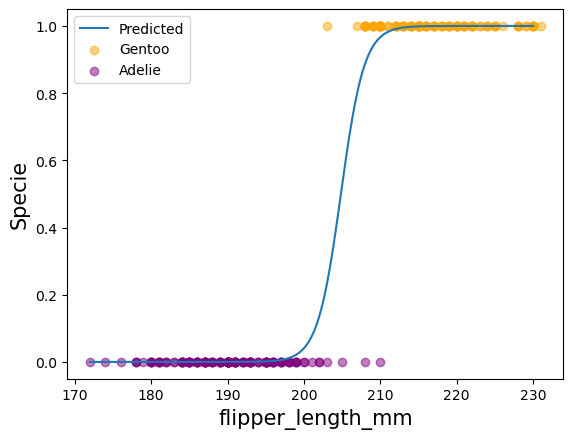

In [15]:
# grafica las probabilidades predichas
plt.plot(X_range, Y_predicted, label='Predicted')

X_gentoo = df_dummy[df_dummy["species_Gentoo"]==1]['flipper_length_mm'].values
X_adelie = df_dummy[df_dummy["species_Gentoo"]==0]['flipper_length_mm'].values

# grafica los valores reales
plt.scatter(X_gentoo, Y[Y == 1], label='Gentoo', color='orange', alpha=0.5)
plt.scatter(X_adelie, Y[Y == 0], label='Adelie', color='purple', alpha=0.5)
plt.xlabel("flipper_length_mm",fontsize=15)
plt.ylabel("Specie",fontsize=15)

# muestra las leyendas
plt.legend()

### Evaluación de la Precisión

Para finalizar, se presenta la evaluación de la precisión del modelo. Calcular la precisión en el conjunto de prueba nos da una medida directa de qué tan bien el modelo está prediciendo las etiquetas correctas. Esta métrica es crucial, ya que nos proporciona una evaluación cuantitativa de la eficacia de nuestro modelo.

- Se calcula la precisión del modelo en el conjunto de prueba con el método `.score()`, que compara las predicciones del modelo con las verdaderas etiquetas `Y_test`.  
- Se imprime la precisión del modelo, así como los coeficientes `A` y la intercepción `B`.


In [16]:
# Evaluación de la precisión del modelo
accuracy = log.score(X_test, Y_test)

print("Accuracy: ", accuracy)
print("A: ", log.coef_, "B: ", log.intercept_)


Accuracy:  0.9854014598540146
A:  [[0.65313089]] B:  [-133.78660491]


Los resultados de la evaluación del modelo de regresión logística indican un rendimiento bastante alto en la tarea de clasificación:

1. **Precisión (Accuracy)**: El modelo alcanzó una precisión de aproximadamente 98.54%. Esto significa que el modelo fue capaz de clasificar correctamente si un pingüino era de la especie Gentoo o no, basándose en la longitud de su aleta, en un 98.54% de los casos en el conjunto de prueba. Este es un resultado muy alto, lo que sugiere que la longitud de la aleta es un excelente predictor para determinar la especie de los pingüinos, al menos dentro de los datos proporcionados.

2. **Coeficiente (A)**: El valor del coeficiente es aproximadamente 0.6531. En la regresión logística, este valor indica cuánto afecta la variable independiente (en este caso, la longitud de la aleta) a la probabilidad logarítmica de que un pingüino pertenezca a la especie Gentoo. Un coeficiente positivo sugiere que a medida que aumenta la longitud de la aleta, también aumenta la probabilidad logarítmica de que el pingüino sea de la especie Gentoo.

3. **Intercepto (B)**: El valor del intercepto es aproximadamente -133.79. Este valor representa la probabilidad logarítmica de que un pingüino sea de la especie Gentoo cuando la longitud de la aleta es 0. Dado que este escenario no es práctico (no existen pingüinos con longitud de aleta de 0), el valor negativo alto del intercepto actúa principalmente para ajustar la curva de la función sigmoide en relación con los datos observados.

En el contexto del problema, estos resultados sugieren que el modelo logístico con la longitud de la aleta como variable independiente es altamente efectivo para clasificar pingüinos entre Gentoo y no Gentoo. La alta precisión indica una clara distinción entre las especies en relación con la longitud de la aleta, y los valores de los parámetros (coeficiente e intercepto) se alinean bien con esta interpretación. Sin embargo, siempre es importante considerar la posibilidad de sesgo en los datos o de sobreajuste, especialmente con un rendimiento tan alto. Una revisión de la representatividad de los datos y la realización de pruebas adicionales, como la validación cruzada, pueden ayudar a asegurar la robustez de estas conclusiones.

Este flujo de trabajo no solo entrena un modelo para clasificar los pingüinos en base a la longitud de la aleta, sino que también proporciona una visualización de cómo el modelo realiza predicciones probabilísticas en comparación con los datos reales. Además, evalúa y comunica la precisión del modelo, lo que es crucial para entender qué tan bien está realizando el modelo la tarea de clasificación.

## Clasificación 2: Dos variables con dos clases

Avanzando en nuestro objetivo de clasificar las especies de pingüinos, nos adentramos en una fase más avanzada del análisis: la Clasificación II, donde empleamos dos variables distintas para diferenciar entre dos clases. Este enfoque ampliado, que se basa en el principio de que más información conduce a mejores predicciones, nos permite explorar con mayor detalle las diferencias entre las especies.

En este caso, las dos variables seleccionadas son la *profundidad del pico* (*bill_depth_mm*) y la *longitud de la aleta* (*flipper_length_mm*), elegidas específicamente por dos razones clave: su *baja correlación mutua*, con una correlación negativa del $-55\%$, y su *capacidad para distinguir claramente entre las especies*. Esto implica que estas dos características, al ser combinadas, ofrecen una perspectiva única y valiosa para el modelo, permitiéndole diferenciar más efectivamente entre las especies.

Las dos clases en las que estamos interesados son las especies de pingüinos *Gentoo* y *no Gentoo* (Adelie). La clasificación se centra en identificar si un pingüino pertenece a la especie *Gentoo*, representada por la variable objetivo `species_Gentoo` en nuestro conjunto de datos. Este enfoque dual, que incorpora dos características descriptivas y diferenciadoras, nos posiciona para lograr una clasificación más precisa, aprovechando las sutilezas de los datos para una identificación más precisa de las especies.

### Preparación de Datos

Iniciamos convirtiendo las categorías a variables numéricas, una técnica común para facilitar el procesamiento por modelos estadísticos que requieren datos numéricos. Ordenamos el DataFrame por `flipper_length_mm`, una decisión que podría ayudar a visualizar mejor las diferencias entre las especies en términos de longitud de aleta.

- `df_dummy` es creado a partir del DataFrame original `df`, utilizando `pd.get_dummies` para convertir variables categóricas en numéricas (variables dummy). Luego, se ordena según la longitud de la aleta (`flipper_length_mm`).

In [17]:
# Preparación de los datos 
# ya fue realizado anteriormente, pero se trae nuevamente para claridad.
df_dummy = pd.get_dummies(df, dtype=int).sort_values(by='flipper_length_mm', ascending=True)
df_dummy

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species_Adelie,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen
27,37.9,18.6,172.0,3150.0,1,0,1,0,0
19,37.8,18.3,174.0,3400.0,1,0,1,0,0
121,40.2,17.0,176.0,3450.0,1,0,0,0,1
30,37.2,18.1,178.0,3900.0,1,0,0,1,0
29,39.5,16.7,178.0,3250.0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...
216,49.8,16.8,230.0,5700.0,0,1,1,0,0
184,59.6,17.0,230.0,6050.0,0,1,1,0,0
226,48.6,16.0,230.0,5800.0,0,1,1,0,0
264,51.5,16.3,230.0,5500.0,0,1,1,0,0


### Selección de Características y Variable Objetivo

La elección de las columnas 1 y 2 como características implica un enfoque cuidadoso, seleccionando atributos que probablemente ofrecen una discriminación clara entre las especies. Este es un punto crucial, ya que las características adecuadas son fundamentales para la eficacia del modelo. El tema de Selección de características ([feature selection](https://www.analyticsvidhya.com/blog/2020/10/feature-selection-techniques-in-machine-learning/)) es un tema crucial en DataScience, que no se abordará en este curso.

- `X` representa las características (predictores), asumiendo que están en la segunda y tercera columna de `df_dummy`. Estas serían probablemente la profundidad del pico (`bill_depth_mm`) y la longitud de la aleta.  
- `Y` es la variable objetivo (*Gentoo* o *no Gentoo*), indicada por `species_Gentoo`.


In [18]:
# Select the features and the target
X = df_dummy.iloc[:, 1:3]  # Assuming that the features are in the 3rd and 4th columns
Y = df_dummy["species_Gentoo"]

### División en Conjuntos de Entrenamiento y Prueba

Dividir los datos en partes iguales para entrenamiento y prueba es un enfoque equilibrado que permite tanto un buen aprendizaje como una prueba rigurosa del modelo. Un conjunto de pruebas del 50% es considerablemente grande, lo que puede ayudar en una evaluación más fiable del rendimiento del modelo.

In [19]:
# Splitting into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=41)

### Entrenamiento del Modelo de Regresión Logística

Utilizamos la Regresión Logística, un modelo clásico para clasificación binaria, conocido por su simplicidad y eficacia. Al entrenar el modelo con los datos, este aprende cómo las variables seleccionadas se relacionan con la probabilidad de que un pingüino sea de la especie Gentoo.

Se crea un modelo de regresión logística (`log`) y se ajusta (entrena) con `X_train` y `Y_train`.

In [20]:
# Fit the Logistic Regression model
log = LogisticRegression()
log.fit(X_train.values, Y_train)

LogisticRegression()

### Creación de un Grid y Predicción de Puntos

Al crear una malla de puntos (`xx, yy`) que cubren el espacio de las características y predecir su clasificación, estamos visualizando el límite de decisión del modelo. Esto no solo proporciona una visión intuitiva de cómo el modelo distingue entre las especies sino que también revela regiones de incertidumbre o zonas donde las clasificaciones podrían no ser tan claras.

In [21]:
# Create a grid to generate a matrix like view
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

### Graficación del Límite de Decisión y Datos Reales

Al graficar los datos reales sobre el límite de decisión, contrastamos las predicciones del modelo con las observaciones reales. Esto puede revelar si el modelo logra capturar patrones existentes en los datos y si hay áreas donde el modelo podría mejorar.

- `plt.contourf` dibuja el límite de decisión.  
- Los puntos reales (`X1_gentoo, X2_gentoo, X1_adelie, X2_adelie`) se grafican para representar las ubicaciones reales de cada especie en el espacio de las dos características.


Text(0, 0.5, 'flipper_length_mm')

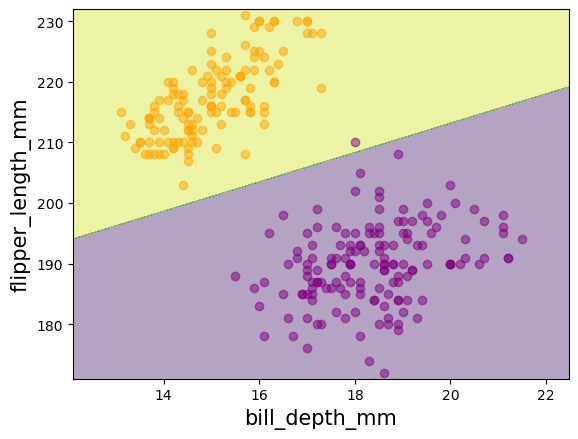

In [22]:
# We predict all points to plot the decision boundary
Z = log.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.4)

X1_gentoo = df_dummy[df_dummy["species_Gentoo"]==1]['bill_depth_mm'].values
X1_adelie = df_dummy[df_dummy["species_Gentoo"]==0]['bill_depth_mm'].values

X2_gentoo = df_dummy[df_dummy["species_Gentoo"]==1]['flipper_length_mm'].values
X2_adelie = df_dummy[df_dummy["species_Gentoo"]==0]['flipper_length_mm'].values

# Plot the scatter plot
plt.scatter(X1_gentoo, X2_gentoo, label='Gentoo', color='orange', alpha=0.5)
plt.scatter(X1_adelie, X2_adelie, label='Adelie', color='purple', alpha=0.5)
plt.xlabel("bill_depth_mm",fontsize=15)
plt.ylabel("flipper_length_mm",fontsize=15)


### Comprobando la Precisión

La precisión del modelo en el conjunto de prueba nos ofrece una idea clara de su rendimiento. Una alta precisión indica que el modelo es efectivo en clasificar correctamente las especies basándose en las dos características elegidas.

- Se calcula la precisión del modelo en el conjunto de prueba con `log.score(X_test, Y_test)`, que es una medida de qué tan bien el modelo predice la especie correcta.  
- Se imprimen los coeficientes (`A`) y la intercepción (`B`) del modelo, y también la precisión.

In [23]:
# Comprobando la Precisión
accuracy = log.score(X_test, Y_test)
print("A: ", log.coef_, "B: ", log.intercept_)
print("Accuracy: ", accuracy)

A:  [[-1.22131371  0.50489829]] B:  [-83.20997884]
Accuracy:  0.9927007299270073


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


### Evaluación del modelo

**Importación de Herramientas de Evaluación:**

Se importan los métodos [`confusion_matrix`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html), [`roc_curve`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve), y [`auc`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html#sklearn.metrics.auc) desde [`sklearn.metrics`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics). Estas son funciones para evaluar modelos de clasificación. La matriz de confusión muestra la precisión de las predicciones del modelo, mientras que la curva ROC y el AUC (área bajo la curva) miden la eficacia del modelo en términos de su capacidad para discriminar entre clases.

**Predicción de Probabilidades para el Conjunto de Prueba**:
   - `Y_pred_proba = log.predict_proba(X_test)[:, 1]` calcula las probabilidades de que las observaciones en el conjunto de prueba (`X_test`) pertenezcan a la clase positiva (en este caso, 'Gentoo'). El `[:, 1]` extrae la probabilidad de la clase positiva.

**Cálculo de la Matriz de Confusión**:
   - `conf_matrix = confusion_matrix(Y_test, log.predict(X_test))` genera la matriz de confusión comparando las etiquetas reales (`Y_test`) con las predicciones del modelo (`log.predict(X_test)`). Esta matriz es una herramienta fundamental para entender cómo se desempeña el modelo, especialmente en términos de falsos positivos y falsos negativos.

**Cálculo de la Curva ROC y AUC**:
   - La función `roc_curve` calcula la tasa de falsos positivos (`fpr`) y la tasa de verdaderos positivos (`tpr`) para diferentes umbrales de decisión. 
   - `roc_auc = auc(fpr, tpr)` calcula el área bajo la curva ROC (AUC), una métrica importante que mide el rendimiento general del modelo, independientemente de cualquier umbral de clasificación específico.

Confusion Matrix:
 [[74  1]
 [ 0 62]]


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


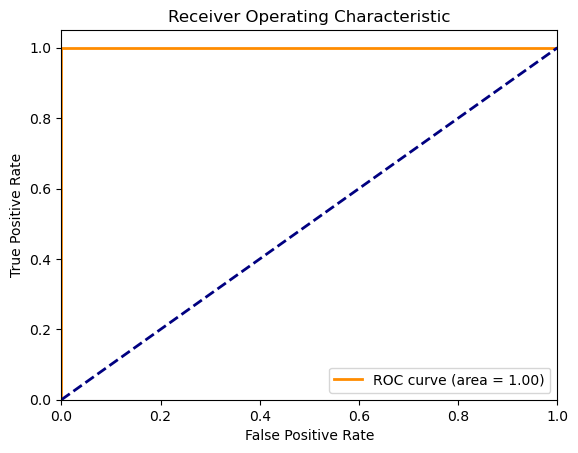

Auc Score:  1.0


In [26]:
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Predicción de las probabilidades para X_test
Y_pred_proba = log.predict_proba(X_test)[:, 1]

# Calcula la matriz de confusion
conf_matrix = confusion_matrix(Y_test, log.predict(X_test))
print("Confusion Matrix:\n", conf_matrix)

# Calcula las curvas ROC y AUC
fpr, tpr, _ = roc_curve(Y_test, Y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

print("Auc Score: ", roc_auc)

La matriz de confusión obtenida ofrece una visión detallada del rendimiento del modelo de clasificación. En el contexto de nuestro problema, donde estamos clasificando pingüinos como Gentoo o no Gentoo, la matriz se puede interpretar de la siguiente manera:

- **Verdaderos Negativos (TN)**: El elemento en la esquina superior izquierda (`74`) representa el número de verdaderos negativos. Esto significa que 74 pingüinos que no eran de la especie Gentoo fueron correctamente identificados como tales por el modelo.

- **Falsos Positivos (FP)**: El elemento en la esquina superior derecha (`1`) indica el número de falsos positivos. Aquí, un pingüino que no era Gentoo fue incorrectamente clasificado como Gentoo.

- **Falsos Negativos (FN)**: El elemento en la esquina inferior izquierda (`0`) muestra el número de falsos negativos. En este caso, no hay falsos negativos; todos los pingüinos Gentoo fueron correctamente identificados.

- **Verdaderos Positivos (TP)**: El elemento en la esquina inferior derecha (`62`) representa los verdaderos positivos, es decir, pingüinos que eran de la especie Gentoo y fueron correctamente clasificados como Gentoo.

El análisis de esta matriz de confusión revela varias conclusiones clave:

1. **Alta Precisión**: El modelo tiene una alta precisión general, evidenciada por el alto número de verdaderos positivos y verdaderos negativos en comparación con los falsos positivos y falsos negativos.

2. **Buen Manejo de la Clase Positiva**: El modelo ha identificado con éxito todos los casos de la especie Gentoo (62 de 62), lo cual es indicativo de una alta sensibilidad o tasa de verdaderos positivos.

3. **Mínimo Error de Clasificación**: Solo se produjo un error significativo en términos de falsos positivos, donde un pingüino no Gentoo fue clasificado erróneamente como Gentoo. Esto sugiere una alta especificidad, aunque con un pequeño margen de mejora.

En resumen, la matriz de confusión indica un rendimiento sobresaliente del modelo en la clasificación de especies de pingüinos, con una notable capacidad para distinguir correctamente entre Gentoo y no Gentoo. Sin embargo, siempre es beneficioso ser cauteloso con respecto a la posibilidad de sobreajuste, especialmente cuando los resultados son excepcionalmente buenos. Un análisis adicional, como la validación cruzada o la aplicación del modelo a un conjunto de datos completamente nuevo, ayudaría a confirmar su robustez y fiabilidad.

### Verificación de las suposiciones

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


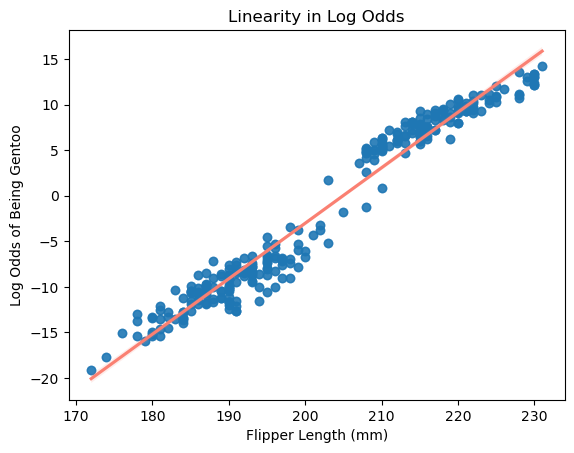

In [27]:
import seaborn as sns

# Calculo de las probabilidades predichas
Y_pred_proba = log.predict_proba(X)[:, 1]

# Convierte las probabilidades a 'log odds'
log_odds = np.log(Y_pred_proba / (1 - Y_pred_proba))

# Plotting
plt.scatter(X['flipper_length_mm'], log_odds, alpha=0.5)
sns.regplot(x='flipper_length_mm', y=log_odds, data=X, line_kws={'color': 'salmon'})
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Log Odds of Being Gentoo')
plt.title('Linearity in Log Odds')
plt.show()

La revisión de las suposiciones en nuestro modelo de Regresión Logística revela que hay una relación lineal entre la variable predictora, la longitud de la aleta de un pingüino, y los log odds de que el pingüino sea de la especie Gentoo. Esta linealidad es una característica clave de la regresión logística, donde un cambio en la variable predictora resulta en un cambio proporcional en los log odds de la ocurrencia del evento (en este caso, ser un pingüino Gentoo). Comprender esta relación es esencial para interpretar cómo diferentes valores de la característica seleccionada pueden afectar la probabilidad de que un pingüino pertenezca a una especie en particular.

El concepto de log odds, que es el logaritmo natural de las odds, juega un papel crucial en este modelo. Las odds representan la razón entre la probabilidad de que ocurra un evento frente a la probabilidad de que no ocurra. Transformando las odds a log odds, se facilita su manejo dentro del modelo, ya que se extiende su escala de una que originalmente va de 0 a infinito a una nueva que va de menos infinito a más infinito. Esta transformación permite una integración eficiente en la regresión logística, donde se modela la relación lineal entre las variables predictoras y los log odds, y luego se convierte esta relación en probabilidades a través de la función sigmoide. Este enfoque matemático proporciona una base sólida para predecir la probabilidad de un evento basado en variables predictoras específicas.

### Análisis de resultado Clasificación 2

Los resultados obtenidos del flujo de trabajo anterior reflejan un alto nivel de precisión en la clasificación de las especies de pingüinos y nos proporcionan insights valiosos sobre cómo las dos variables seleccionadas, la profundidad del pico y la longitud de la aleta, contribuyen a la predicción:

1. **Coeficientes del Modelo (A)**: Los coeficientes son `[-1.22131371, 0.50489829]`. Estos valores indican cómo cada una de las variables influye en la probabilidad de que un pingüino sea de la especie Gentoo. Un coeficiente negativo para la profundidad del pico (-1.22131371) sugiere que a medida que esta medida aumenta, la probabilidad de que el pingüino sea Gentoo disminuye. Por otro lado, el coeficiente positivo para la longitud de la aleta (0.50489829) implica que mayores longitudes de aleta están asociadas con una mayor probabilidad de ser un pingüino Gentoo.

2. **Intercepción del Modelo (B)**: El valor de la intercepción es `-83.20997884`. Este valor actúa como un ajuste en la función sigmoide, estableciendo el punto de partida antes de considerar el impacto de las variables. Aunque este número puede parecer grande, es importante recordar que funciona dentro del contexto de la función logística y debe interpretarse en relación con los coeficientes de las variables.

3. **Precisión del Modelo**: Una precisión de aproximadamente 99.27% es excepcionalmente alta. Esto indica que el modelo, utilizando las dos variables seleccionadas, ha sido capaz de clasificar con gran precisión si un pingüino pertenece a la especie Gentoo o no en el conjunto de prueba. Una precisión de este nivel sugiere que la combinación de la profundidad del pico y la longitud de la aleta es muy efectiva para esta tarea de clasificación.

En conclusión, estos resultados demuestran la eficacia de un enfoque de clasificación que integra múltiples variables. Al elegir características que ofrecen diferentes perspectivas y están menos correlacionadas, hemos creado un modelo que no solo es preciso sino que también proporciona una comprensión más rica de las relaciones en nuestros datos. Este alto nivel de precisión, sin embargo, también nos invita a ser cautelosos con respecto al sobreajuste y a considerar la realización de pruebas adicionales para validar la robustez del modelo.

## Conclusión

Este proceso muestra cómo la Regresión Logística puede ser usada no solo para predecir la especie de un pingüino basándose en medidas físicas, sino también para visualizar el espacio en el que el modelo toma sus decisiones, lo que es crucial para comprender cómo las diferentes características contribuyen a estas decisiones.

En resumen, este flujo de trabajo integra una cuidadosa preparación de datos, una selección estratégica de características, un enfoque equilibrado en la división de datos, un modelado efectivo y una visualización detallada para proporcionar una comprensión profunda y una evaluación rigurosa del modelo de clasificación binaria en el contexto de las especies de pingüinos.

Al concluir nuestras dos fases de clasificación, los resultados obtenidos ofrecen una visión integral y detallada sobre la identificación de especies de pingüinos utilizando métodos de regresión logística. Cada fase de clasificación ha contribuido de manera significativa a nuestra comprensión de cómo las diferentes características físicas de los pingüinos pueden ser utilizadas para clasificarlos con precisión en sus respectivas especies.

En la **Clasificación I**, donde utilizamos solamente la longitud de la aleta, el modelo alcanzó una impresionante precisión de alrededor del 98.54%. Esto subrayó la efectividad de la longitud de la aleta como un indicador distintivo entre las especies, especialmente para diferenciar entre pingüinos Gentoo y no Gentoo. El modelo reveló una relación lineal clara y significativa entre esta característica física y la especie del pingüino.

Avanzando a la **Clasificación II**, ampliamos nuestro análisis para incluir dos variables: la profundidad del pico y la longitud de la aleta. Esta aproximación mejorada llevó a una precisión aún mayor, alcanzando aproximadamente un 99.27%. La inclusión de una segunda variable, que estaba menos correlacionada con la longitud de la aleta y aportaba información complementaria, permitió al modelo capturar una mayor complejidad en los datos. Esto se reflejó en la capacidad del modelo para diferenciar más eficazmente entre las especies de pingüinos.

Estos resultados enfatizan el valor de un enfoque multicapa en la clasificación de especies utilizando aprendizaje automático. Al comenzar con un modelo más simple y luego agregar complejidad, pudimos observar y comprender cómo la inclusión de diferentes variables afecta la precisión del modelo. La alta precisión lograda en ambas fases indica que las características seleccionadas son indicadores significativos y confiables para la clasificación de especies de pingüinos.

En conclusión, este estudio demuestra la potencia y la flexibilidad del modelado estadístico en el campo de la biología y la conservación. Al elegir y combinar cuidadosamente las características relevantes, los modelos de aprendizaje automático pueden ofrecer predicciones precisas y perspectivas valiosas, lo que es crucial en la investigación y la toma de decisiones informadas en la conservación de la vida silvestre.

## Alertas

Dado el alto nivel de precisión alcanzado en este estudio, es importante tener en cuenta varias consideraciones y precauciones para asegurarnos de que nuestras conclusiones sean sólidas y confiables:

1. **Selección de Variables**: La elección adecuada de las características es crucial. Las variables seleccionadas deben ser relevantes para el problema en cuestión y capaces de proporcionar una discriminación clara entre las clases. Sin embargo, es importante tener en cuenta que la inclusión de más o distintas variables no siempre garantiza mejores resultados. La selección debe ser guiada por conocimientos previos y análisis exploratorios de datos.

2. **Riesgo de Sobreajuste**: Un modelo que muestra una precisión excepcionalmente alta puede estar sobreajustado, especialmente si el conjunto de datos es pequeño o no es representativo de la población general. El sobreajuste ocurre cuando un modelo aprende patrones específicos de los datos de entrenamiento, incluyendo ruidos o anomalías, que no se generalizan bien a datos no vistos. Es crucial validar el modelo con conjuntos de datos independientes o mediante técnicas como la validación cruzada.

3. **Generalización del Modelo**: Los resultados obtenidos son específicos para el conjunto de datos en estudio. La capacidad del modelo para generalizar a otros conjuntos de datos de pingüinos o a otras especies dependerá de la variabilidad y las diferencias en las características entre diferentes poblaciones.

4. **Equilibrio de las Clases**: Si una clase es mucho más frecuente que la otra en el conjunto de datos, puede introducir un sesgo en el modelo. En tales casos, aunque el modelo pueda tener una alta precisión general, podría no ser eficiente en la clasificación de la clase menos representada. Es importante considerar el equilibrio de clases en el análisis.

5. **Interpretación Cautelosa de los Coeficientes**: En la regresión logística, los coeficientes indican la importancia relativa de cada característica, pero deben interpretarse con cuidado, especialmente en presencia de variables correlacionadas.

6. **Relevancia Biológica y Ecológica**: Es esencial que las conclusiones del modelo tengan sentido desde una perspectiva biológica y ecológica. La validación de los resultados con expertos en el campo y la literatura existente es crucial para asegurar que los resultados del modelo son realistas y aplicables.

En resumen, aunque los resultados del estudio son prometedores, deben ser considerados con un enfoque crítico y cuidadoso, teniendo en cuenta el contexto biológico, la calidad y representatividad de los datos, y la potencial idiosincrasia del conjunto de datos utilizado.

# Comentario final

El estudio presentado proporciona un marco y una metodología para abordar problemas de clasificación en un contexto específico, pero es crucial enfatizar que no debe ser tomado como una fórmula infalible o un método estándar aplicable a todas las situaciones. Cada conjunto de datos y problema de clasificación tiene sus propias peculiaridades y desafíos únicos. Lo que funciona bien en un contexto, como la clasificación de especies de pingüinos, puede no ser directamente trasladable a otro, debido a diferencias en la naturaleza de los datos, la distribución de las características, y los objetivos del estudio.

Además, los métodos y enfoques en el análisis de datos están en constante evolución, y lo que es considerado como una práctica óptima hoy podría ser reemplazado por técnicas más avanzadas en el futuro. Por lo tanto, es fundamental que los investigadores y analistas mantengan un enfoque crítico y exploratorio, adaptando y ajustando las metodologías a las necesidades específicas y a las características de sus propios datos.

Es también importante tener en cuenta las limitaciones inherentes a cualquier modelo o técnica estadística y reconocer que no hay soluciones únicas o absolutas en el campo del análisis de datos. La colaboración con expertos en el dominio del problema, la realización de pruebas exhaustivas, la validación cruzada y la exploración de diversas técnicas son pasos esenciales para construir un análisis sólido y fiable.

En conclusión, aunque el estudio proporciona una valiosa perspectiva sobre cómo abordar un problema de clasificación, debe ser considerado como un punto de partida o una inspiración, más que como una guía definitiva. La creatividad, la adaptabilidad y el rigor científico son fundamentales para el éxito en la resolución de problemas reales y complejos en el ámbito de la ciencia de datos.